Data Science Project 3 - Modeling 1

Jeffrey A. Rutledge   April 24, 2018

Project Goal: Implement modeling process learned in class, with the primary goal being to frame, evaluate, and discuss a classification problem using at least Logistic Regression.  Our Jupyter Notebook contained herein includes our solution of the assignment, based on a step-by-step format that follows Project 3's instructions and specific requirements.

First, we import all necessary Python libraries.

In [1]:
# Import all Python libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import pylab as pl

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Requirement 1: Describe the dataset including either an explicit data dictionary (in the case of a smaller dataset) or a link to an original data dictionary (in the case of a large dataset).

In [2]:
# Import "Admissions" dataset and show first five observations (rows) via .head() command
df_admit_raw = pd.read_csv("~/GA-datascience/projects/unit-projects/project-3/assets/admissions.csv")
print(df_admit_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


The dataset includes four variables including one independent variable (our "target"), "admit", and three independent variables, "gre", "gpa", and "prestige".  Each observation (or rows) includes the three independent variables ("features") which tell us the student's undergraduate GPA, his/her GRE score, and "prestige" which is an assessment of his/her undergraduate college's reputation.  The independent variable, "admit", is a classification variable where result "1" or "0" refer to whether the student was admitted or not admitted to graduate school, respectively.  The dataset includes 400 observations (rows), each inclduing the four variables (features).  However, initial inspection of the data (see below) suggest there are a few missing observations in the indenpendent variables (features).  These missing data must be addressed.

In [3]:
df_admit_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [4]:
df_admit_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


Requirement 2:  Explicitly frame your classification problem; what are you measuring and how are you going to understand the quality of your model? 

We will create a model that assesses the probability, or likelihood, of students being accepted to graduate school based on their gpa's, gre scores, and the quality of their undergraduate colleges.  Specifically, we will create a logistic regression (classification) model that predicts "admit" (the single dependent variable that represents the predicted likelihood of graduate school admission) based upon some combination of three dependent variables (gpa, gre score, undergraduate school reputation).  The "Admissions" data, which we show include 397 complete observations, establishes a baseline of 31.7% of students admitted to graduate school.  We will evaluate the efficacy of our model following running our test set by examining a classification report (precision, reall, F1, and support statistics) and and a confusion matrix (error matrix).

Requirement 3:  Describe any data cleaning and feature manipulation prior to model implementation.

Our initial inspection of the dataset highlighted the need to "clean" the raw data.  Specifically, we observed 400 total observations, but noted that both the "gre" and "gpa" features are missing two data points each, and "prestige" is missing one.  To deal with this missing data points, we can either "fill them in" via the "mean" or "median" methods, or we can simply eliminate the entire observation (via .dropna() command) where a data item is missing.  We chose to drop these observations.  The code below shows our work.  "df_admit" is intriduced as the "clean" version of the raw data "df_admit_raw".

In [5]:
df_admit = df_admit_raw.dropna()

In [6]:
df_admit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 4 columns):
admit       397 non-null int64
gre         397 non-null float64
gpa         397 non-null float64
prestige    397 non-null float64
dtypes: float64(3), int64(1)
memory usage: 15.5 KB


In [7]:
df_admit.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [8]:
admit = df_admit[df_admit['admit'] == 1]

In [9]:
df_admit[df_admit['admit'] == 1].admit.sum() / df_admit.shape[0]

0.31738035264483627

After cleaning the "Admissions" dataset and removing the three rows containing null (missing) values, we assess our "baseline" of accepted students into graduate school.  Specifically, we find that of the total 397 students who applied to graduate school, 126 students were accepted, or a 31.7% acceptance rate.  Therefore, a probability of 31.7% is our dataset's baseline.   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c14e37c18>,
      dtype=object)

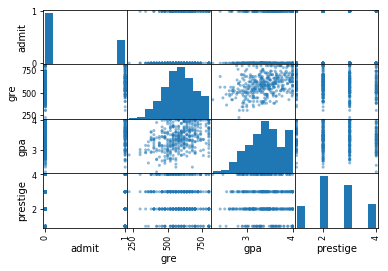

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_admit)

In [11]:
df_admit_correlations = df_admit.corr()

In [12]:
print(df_admit_correlations)

             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000


In [13]:
import seaborn as sns

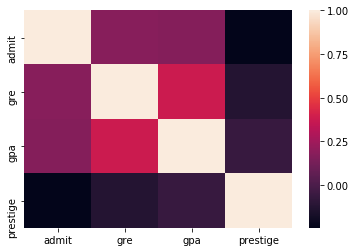

In [14]:
sns.heatmap(df_admit_correlations)

In [15]:
prestige_dummies = pd.get_dummies(df_admit.prestige)

In [16]:
prestige_dummies.head()

,1.0,2.0,3.0,4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


Requirement 4:  Describe any parameter tuning or normalization that took place

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import cross_validation

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
#Introduce X and y variables for train-test-split and regression fitting
X = df_admit.drop('admit', axis=1)
y = df_admit['admit']

In [19]:
# Split train-test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
#Instantiate, fit, and evaluate model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Requirement 5: Be sure to use cross-validation in training

In [21]:
#Perform cross valiadation on training set
from sklearn.model_selection import cross_val_score

In [22]:
cv_scores = cross_val_score(lr, X_train, y_train, cv = 10)

In [23]:
cv_scores

array([0.70967742, 0.61290323, 0.70967742, 0.76666667, 0.72413793,
       0.75862069, 0.75862069, 0.72413793, 0.68965517, 0.62068966])

Requirement 6: Discuss results on test set

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
admit_predict = lr.predict(X_test)

In [26]:
print(classification_report(y_test, admit_predict))

             precision    recall  f1-score   support

          0       0.71      0.90      0.79        67
          1       0.53      0.24      0.33        33

avg / total       0.65      0.68      0.64       100



Classification reports provide accuracy statistics for our classification model's test set results.  The report shows four statistics: precision, recall, F1-score, and support.  "Precision" refers to the classification model's ability NOT to label as positive a data point that is negative.  "Recall" is the model's ability to locate all positive data points.  "F1-score" is a measure of the classification model's accuracy and is the harmonic mean of the precision and recall scores (0 < F1-score < 1; F1=1 > perfect precision, recall; F1=0 > no precision).  "Support" is the the number of occurrences in each class in y_test. 

In [27]:
print(confusion_matrix(admit_predict, y_test))

[[60 25]
 [ 7  8]]


A confusion matrix (or "error matrix") is a table that describes the performance of a classification model on a set of test data.  Basic terms include "true positives" (TP: predict yes/actual yes; lower right quadrant; 8 in our matrix), "true negatives" (TN: predict no/actual no; upper left quadrant; 60), "false positives" (FP: predict yes/actual no; upper right quadrant; 25), and "false negatives" (FN: predict no/actual yes; lower left quadrant; 7).

Requirement 7: Describe Accuracy, Precision, Recall, and F1 score of your model

Our classification model's ability to accurately predict application denial appears reasonable, but its abilty to predict acceptance is largely non-existent.  Considering acceptance prediction: the model predicted a 33% acceptance rate on the test data; this compares favorably with our 31.7% baseline.  However, the model shows no credibility to predict acceptance overall => the acceptance precision score = 0.53, recall shows < 25% ability to locate positive datapoints, and the F1-score (0.33) is closer to 0 than perfect.  Considering application denial: the model seems to predict application denial reasonably well.  It predicted a 67% denial rate (baseline 68.3%), the precision score of 0.71 suggests the model is over 70% accurate in correctly labeling negative data points, the 0.9 recall score suggests the model is 90% accurate in correctly identifying denial data points, and the F1-score is approaching 80% (not perfect, but well above 50%).

Finally, our confusion matrix only shows a reasonably accurate "true negative" score (TN=60, upper left quadrant, predict no/actual no).  This corroborates our assessment based on the classification report.  All other scores as shown by the confusion matrix suggest our model displays poor ability to accurately predict grad school acceptance.   

Requirement 8a: Plot and interpret the Precision and Recall curves together (thresholds vs. probability)

In [28]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc

In [35]:
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

AttributeError: Unknown property fillsize

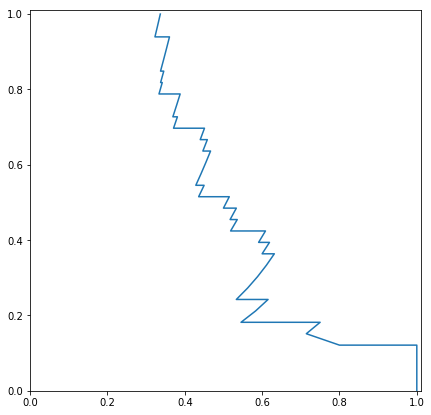

In [37]:
plt.figure(figsize = (7, 7))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillsize = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)

Requirement 8b: Plot and interpret Precision vs. Recall

Requirement 8c: Plot and interpret the ROC curve.

In [38]:
y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve (y_test, y_score_lr)
roc_auc_lr = auc(frp_lr, tpr_lr)

NameError: name 'frp_lr' is not defined